DATA SOURCE : https://github.com/alexeygrigorev/clothing-dataset-small

In [1]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving clothing-dataset-small-master.zip to clothing-dataset-small-master.zip


In [2]:
!unzip -q /content/clothing-dataset-small-master.zip

In [ ]:
# Now let's plot Samples from each of these classes and Data Distribution across samples!
import os
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns


class_dirs = os.listdir("clothing-dataset-small-master/train")
image_dict = {}
count_dict = {}

for cls_dir in class_dirs:
  file_path = glob.glob(f'clothing-dataset-small-master/train/{cls_dir}/*')
  count_dict[cls_dir] = len(file_path)

  image_path = random.choice(file_path)
  image_dict[cls_dir] = tf.keras.utils.load_img(image_path)

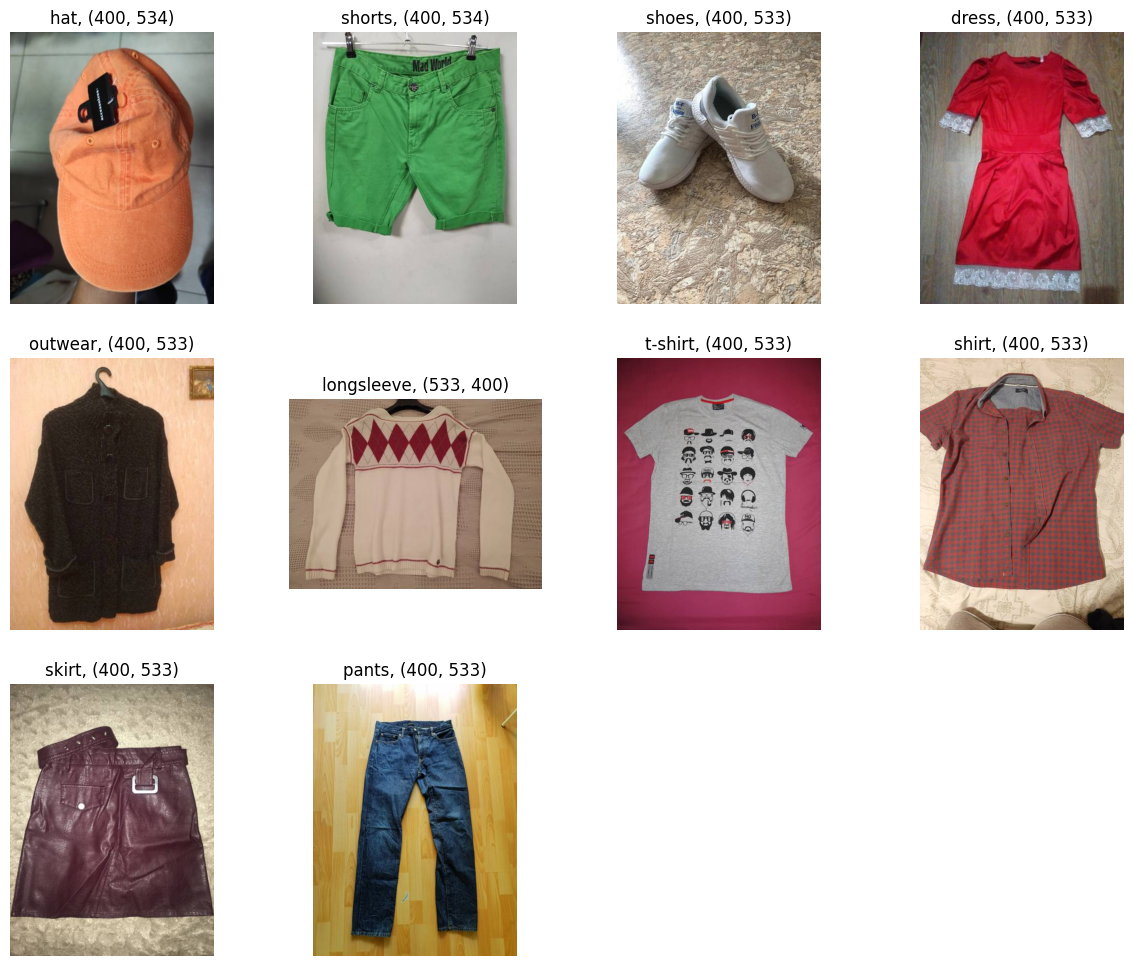

In [ ]:
# Viz random samples from each class

plt.figure(figsize=(15, 12))

for i, (cls,img) in enumerate(image_dict.items()):
  ax = plt.subplot(3, 4, i+1)
  plt.imshow(img)
  plt.title(f'{cls}, {img.size}')
  plt.axis('off')

<Axes: title={'center': 'Training data distribution across class'}, xlabel='class'>

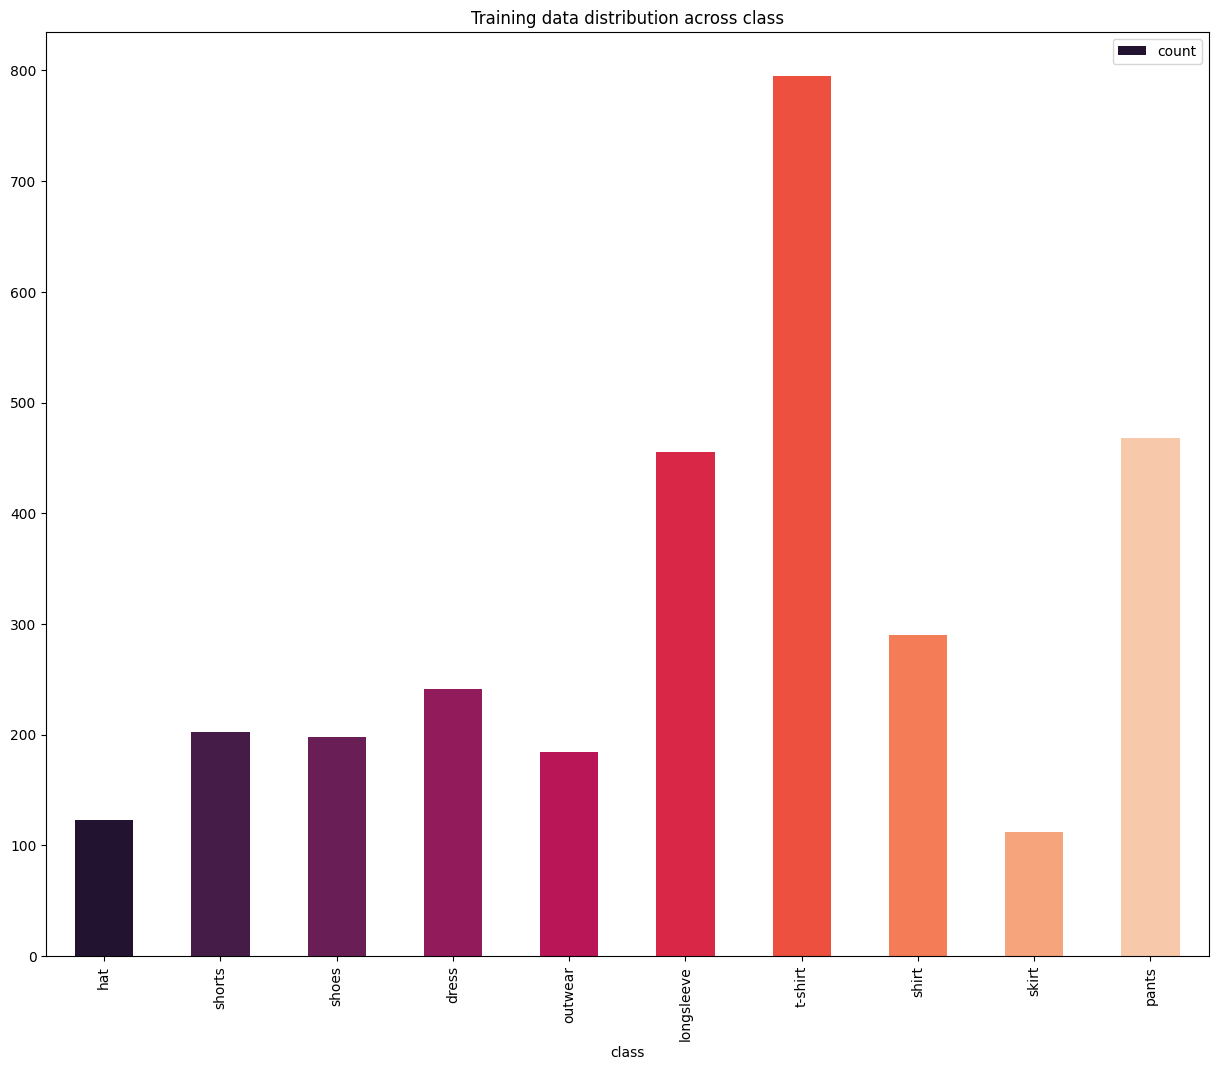

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'class': count_dict.keys(), 'count': count_dict.values()})
df.plot.bar(x='class', y='count', title='Training data distribution across class', figsize=(15,12), color=sns.color_palette("rocket", len(df)))

In [ ]:
import tensorflow as tf

print('\nLoading Training Data...')
train_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/train", shuffle=True)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/validation", shuffle=False)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/test", shuffle=False)


Loading Training Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


In [ ]:
# Configuration

config = {
    'num_class':10,
    'height':128,
    'width': 128,
    'hiiden_size_1':1024,
    'hidden_size_2':256,
    'batch_size':10,
    'epochs':10,
}

In [ ]:
# Resize and Rescale

def preprocess(image):
  image = image / 255.0
  image = tf.image.resize(image, [config['height'], config['width']])
  return image

train = train_data.map(lambda x, y: (preprocess(x), y))
test = test_data.map(lambda x, y: (preprocess(x), y))
val = val_data.map(lambda x, y: (preprocess(x), y))

In [ ]:
Input_shape = tf.keras.Input(shape=(config['height'], config['width'], 3))

x1 = tf.keras.layers.Conv2D(32, (3,3), strides=1, activation='relu')(Input_shape)
x1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)

x2 = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu')(x1)
x2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)

x3 = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu')(x2)
x3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)

x4 = tf.keras.layers.GlobalMaxPool2D()(x3)

x5 = tf.keras.layers.Dense(config['hiiden_size_1'], activation='relu')(x4)
x5 = tf.keras.layers.Dropout(0.2)(x5)

x6 = tf.keras.layers.Dense(config['hiiden_size_1'], activation='relu')(x5)
x6 = tf.keras.layers.Dropout(0.2)(x6)

output = tf.keras.layers.Dense(config['num_class'], activation='softmax')(x6)

model = tf.keras.Model(inputs=Input_shape, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,194 (4.90 MB)

 Trainable params: 1,285,194 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train,
    validation_data=val,
    epochs=1,              # change the epochs size to config['epochs']
    callbacks=[early_stopping]
)

96/96 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.5223 - loss: 1.4011 - val_accuracy: 0.4575 - val_loss: 1.5986


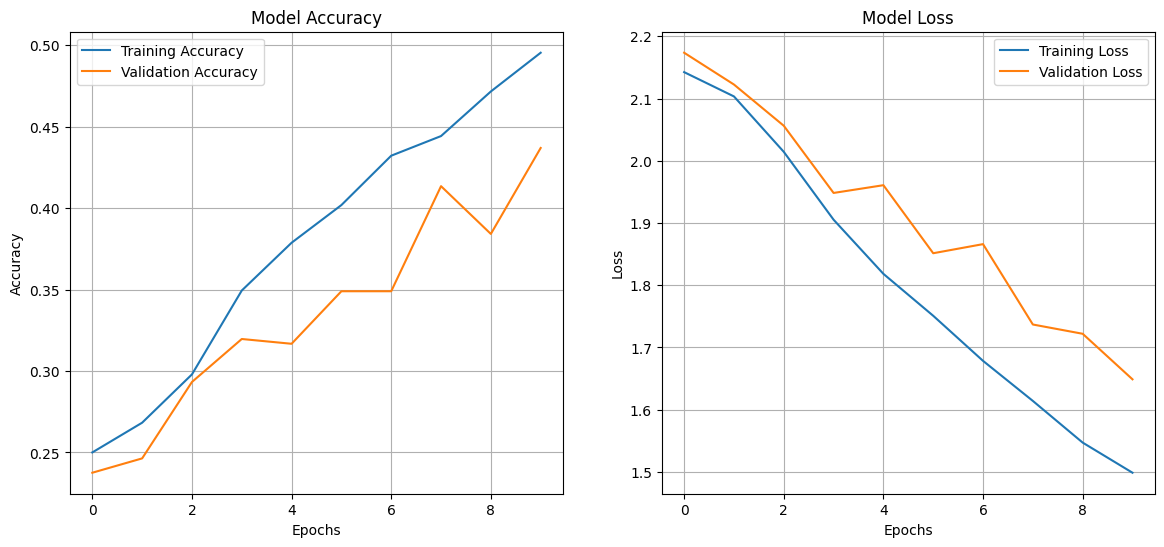

In [ ]:
import matplotlib.pyplot as plt

# Extract the training history from the 'history' object
history = model.history

# Plot the accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()


### **Transfer Learning**

* Transfer learning is a machine learning technique that uses knowledge gained from one task to improve performance on a related task. It's similar to how humans learn new skills by applying previously acquired knowledge to new situations.

In [3]:
import tensorflow as tf

# The training data is loaded from the specified directory.
# - shuffle=True: This will randomly shuffle the data, which helps prevent the model from learning in a specific order.
# - seed=42: The seed ensures that the shuffle happens in a deterministic way, so the results are reproducible.
# - batch_size=10: The dataset is divided into batches of 10 images at a time.
# - image_size=(128, 128): Each image is resized to 128x128 pixels.

print('\nLoading Training Data...')
train_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/train", shuffle=True, seed=42, batch_size=10, image_size=(128, 128))

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/validation", shuffle=False, seed=42, batch_size=10, image_size=(128, 128))

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory("clothing-dataset-small-master/test", shuffle=False, seed=42, batch_size=10, image_size=(128, 128))


Loading Training Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


In [4]:
import tensorflow as tf

# Load the pre-trained VGG16 model from ImageNet, with the top (fully connected layers) included
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,                         # Set to False because we are going to replace the top layers
    weights='imagenet',                        # Load pre-trained weights from ImageNet
    input_tensor=None,                         # No specific input tensor, the model will infer it from input_shape
    input_shape=(128, 128, 3),                 # Input shape for the images (128x128, with 3 color channels)
    pooling=None,                              # No global pooling layer included, we will manually add it later
    classes=1000,                              # The original VGG16 has 1000 output classes for ImageNet
    classifier_activation='softmax'            # Activation function for classification
)

# Freeze the layers of the pre-trained model, so their weights won't be updated during training
pretrained_model.trainable = False

# Add the pre-trained VGG16 model as a feature extractor and Get the output from the pre-trained model
x1 = pretrained_model.output

# Flatten the output from the pre-trained model to feed it into dense layers
x2 = tf.keras.layers.Flatten()(x1)

# Add a Dense layer with 10 output units (for 10 classes) and softmax activation for classification
x3 = tf.keras.layers.Dense(10, activation='softmax')(x2)

# Create the final model combining the pre-trained model with the added layers
model = tf.keras.Model(inputs=pretrained_model.input, outputs=x3)

# Print the model summary to check the architecture
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          81,930 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,796,618 (56.44 MB)

 Trainable params: 81,930 (320.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
#Early stopping if there is no improvement after three epoche
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Compile the model for BP
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    callbacks=[early_stopping]
)

Epoch 1/3
307/307 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - accuracy: 0.5883 - loss: 11.7862 - val_accuracy: 0.7625 - val_loss: 7.8123
Epoch 2/3
307/307 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.9032 - loss: 1.9957 - val_accuracy: 0.7830 - val_loss: 8.9831
Epoch 3/3
307/307 ━━━━━━━━━━━━━━━━━━━━ 745s 2s/step - accuracy: 0.9309 - loss: 1.4117 - val_accuracy: 0.7771 - val_loss: 8.4403


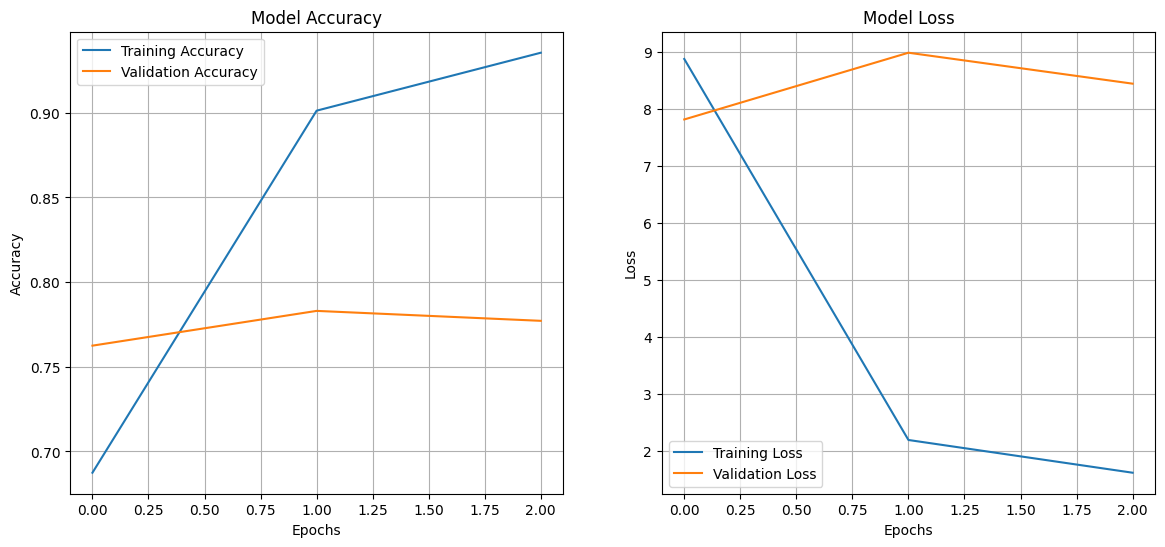

In [7]:
import matplotlib.pyplot as plt

# Extract the training history from the 'history' object
history = model.history

# Plot the accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()